In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
%cd drive/My Drive/Colab Notebooks/Music Mood Recognition

/content/drive/My Drive/Colab Notebooks/Music Mood Recognition


In [5]:
!ls

1_Scraping.ipynb			    auth.py	 funcs.py
2_EDA					    data	 __pycache__
3_Modeling_with_preexisting_features.ipynb  EDA.py	 scrapes
4_feature_engineering.ipynb		    funcs.ipynb  Scraping.py


In [6]:
style.use('fivethirtyeight')

In [7]:
songs = pd.read_csv('./data/five_moods_30_samp.csv')

In [8]:
X = songs._get_numeric_data().drop(columns=['key', 'mode'])
y = songs['mood']

In [9]:
def running_models(X, y, scaled=False, c=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)
    
    # MODELING WITH SCALED FEATURES #
    
    # Scale the features
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    # Creating a df to display results
    model_df = pd.DataFrame(columns=['train_score', 'test_score'])
    
    model_sc = SVC(C=c, kernel='rbf', degree=3)
    model_sc.fit(X_train_sc, y_train)
    train_score = model_sc.score(X_train_sc, y_train)
    test_score = model_sc.score(X_test_sc, y_test)
    
    row = {'model': type(model_sc).__name__,
           'train_score' : train_score,
          'test_score' : test_score,
           'C': c,
          'scaled': True}
    model_df = model_df.append(row, ignore_index=True)
    
    # MODELING WITH UNSCALED FEATURES #
    
    model = SVC(C=20000, kernel='rbf', degree=3)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    row = {'model': type(model).__name__,
       'train_score' : train_score,
      'test_score' : test_score,
       'C': 20000,
      'scaled': False}
    model_df = model_df.append(row, ignore_index=True)
    return model_df

In [10]:
running_models(X, y)

,train_score,test_score,C,model,scaled
0,0.901786,0.789474,10.0,SVC,1.0
1,0.758929,0.736842,20000.0,SVC,0.0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)

In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [13]:
model = SVC(C=10, kernel='rbf')

In [14]:
model.fit(X_train_sc, y_train)

SVC(C=10)

In [15]:
model.score(X_train_sc, y_train)

0.9017857142857143

In [16]:
model.score(X_test_sc, y_test)

0.7894736842105263

In [17]:
y_preds = model.predict(X_test_sc)

In [18]:
results = X_test.copy()

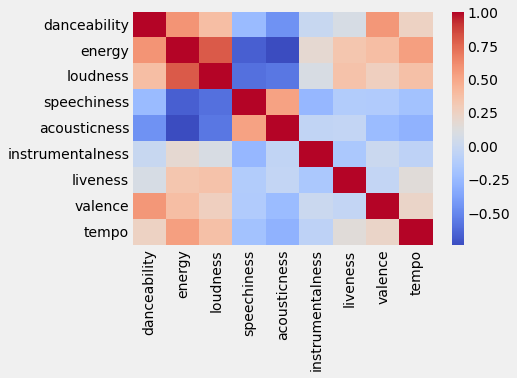

In [19]:
sns.heatmap(results.corr(), cmap='coolwarm');

In [20]:
results.loc[:, 'mood'] = y_test.copy()

In [21]:
results.loc[:, 'preds'] = y_preds.copy()

In [22]:
results_wrong = results[results['mood'] != results['preds']]

In [23]:
results_wrong['mood'].value_counts(normalize=True)

Sad         0.25
Relaxing    0.25
Happy       0.25
Romance     0.25
Name: mood, dtype: float64

In [24]:
results_wrong[results_wrong['mood'] == 'Dark']['preds'].value_counts(normalize=True)

Series([], Name: preds, dtype: float64)

In [25]:
results_wrong[results_wrong['mood'] == 'Sad']['preds'].value_counts(normalize=True)

Relaxing    0.5
Romance     0.5
Name: preds, dtype: float64

In [26]:
genre_mean = songs.groupby('mood').mean()

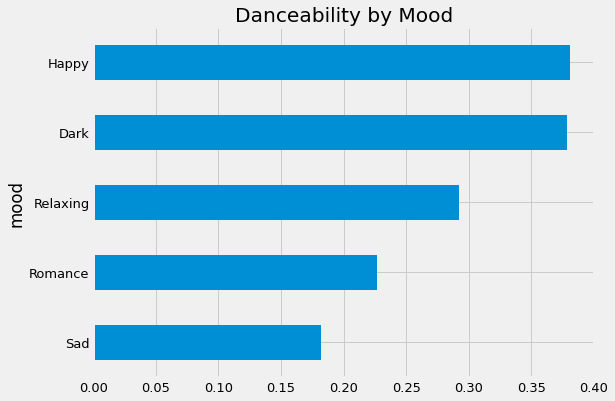

In [27]:
genre_mean['danceability'].sort_values().plot(kind='barh', fontsize=13, figsize=(8, 6))
plt.title('Danceability by Mood');

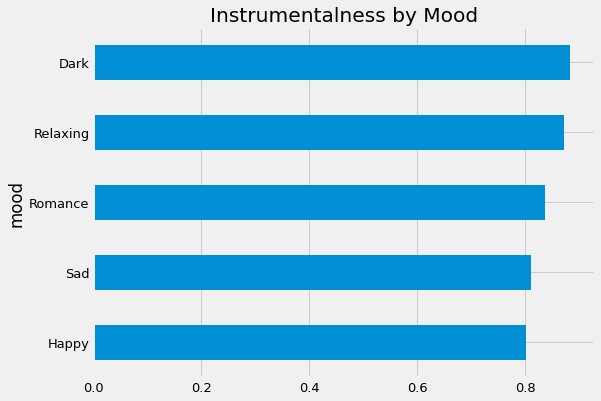

In [28]:
genre_mean['instrumentalness'].sort_values().plot(kind='barh', fontsize=13, figsize=(8, 6))
plt.title('Instrumentalness by Mood');

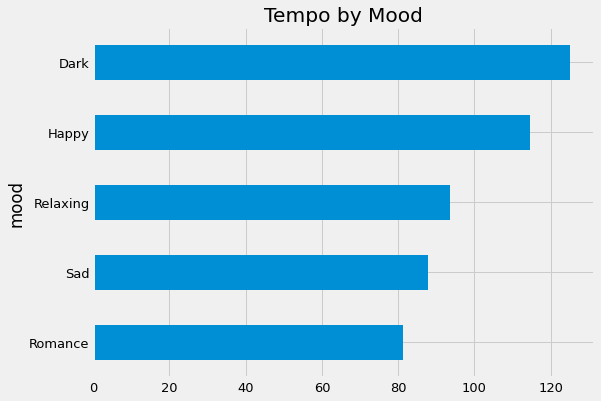

In [29]:
genre_mean['tempo'].sort_values().plot(kind='barh', fontsize=13, figsize=(8, 6))
plt.title('Tempo by Mood');